使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练。

In [21]:
import torch
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST

In [2]:
# 加载数据集 train
train_data = KMNIST(root='./kmnist_data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./kmnist_data', train=False, download=True,
                         transform=ToTensor())

e:\software\miniconda3\install\envs\py312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [3]:
train_data

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ./kmnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
print(train_data[1])  # 返回一个元组，第一个元素是图像数据，第二个元素是标签
print(train_data[1][0].shape)  # 图像数据(1个颜色通道,图像高度,图像宽度)
print(train_data[1][0].reshape(-1).shape)  # 将图像数据展平为一维张量

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

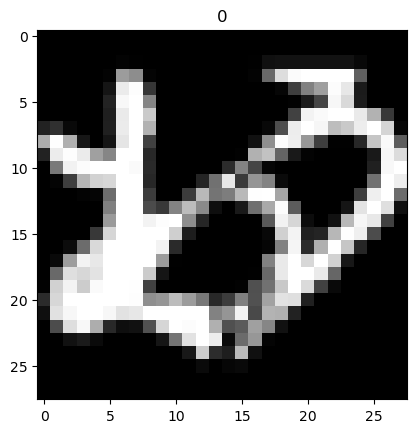

In [45]:
import matplotlib.pyplot as plt
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
train_data = KMNIST(root='./kmnist_data', train=True, download=True)

img,clzz = train_data[2]

plt.imshow(img, cmap='gray')  # img是一个PIL.Image对象(python原始数据)
plt.title(clzz)
plt.show()
img

In [40]:
labels = set([clz for img,clz in train_data])
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

搭建模型

In [ ]:
# 简单实现
import torch
import torch.nn as nn  # 常用模块
import torch.optim as optim  #优化器

from torch.utils.data import DataLoader  # 数据加载器  

# X输入 shape(,784)
# 隐藏层 shape(784,56)  # 参数矩阵 # 784个特征 56个神经元
# 隐藏层 shape(56,)  # 偏置bias
# 输出层 shape(56,10)  # 参数矩阵 # 64个神经元 10个类别
# 输出层 shape(10,)  # 偏置bias
# Y输出 shape(,10)  # 10个类别

In [467]:
# 定义超参数
LR = 1e-2   ##学习率
epochs = 20      ##训练次数
BATCH_SIZE = 25  ###批次

In [468]:
# 加载数据集 train 加上transform=ToTensor() 
train_data = KMNIST(root='./kmnist_data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./kmnist_data', train=False, download=True,
                         transform=ToTensor())

In [469]:
# 定义模型
model = nn.Sequential(
    nn.Linear(784, 1000),
    nn.Sigmoid(),
    nn.Linear(1000, 500),
    nn.ReLU(),
    nn.Linear(500, 255),
    nn.ReLU(),
    nn.Linear(255,10)
)

In [470]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [471]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据

In [472]:
for epoch in range(epochs):
    # 提取训练数据
    for data, target in trian_dl:
        # 前向运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'BatchSize:{BATCH_SIZE} Epoch:{epoch} Loss: {loss.item()}')

BatchSize:25 Epoch:0 Loss: 1.9861161708831787
BatchSize:25 Epoch:1 Loss: 1.1890045404434204
BatchSize:25 Epoch:2 Loss: 0.7190592288970947
BatchSize:25 Epoch:3 Loss: 0.5034181475639343
BatchSize:25 Epoch:4 Loss: 0.6044895052909851
BatchSize:25 Epoch:5 Loss: 0.3761017918586731
BatchSize:25 Epoch:6 Loss: 0.6697747111320496
BatchSize:25 Epoch:7 Loss: 0.17297737300395966
BatchSize:25 Epoch:8 Loss: 0.40198785066604614
BatchSize:25 Epoch:9 Loss: 0.49235886335372925
BatchSize:25 Epoch:10 Loss: 0.3792593777179718
BatchSize:25 Epoch:11 Loss: 0.3443739712238312
BatchSize:25 Epoch:12 Loss: 0.21543532609939575
BatchSize:25 Epoch:13 Loss: 0.3583548665046692
BatchSize:25 Epoch:14 Loss: 0.38327518105506897
BatchSize:25 Epoch:15 Loss: 0.33750319480895996
BatchSize:25 Epoch:16 Loss: 0.6967771649360657
BatchSize:25 Epoch:17 Loss: 0.4816640615463257
BatchSize:25 Epoch:18 Loss: 0.12449073791503906
BatchSize:25 Epoch:19 Loss: 0.3193734586238861


In [473]:
# 测试
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

correct = 0
total = 0
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 784))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')

Accuracy: 80.69%


In [474]:
output.shape



torch.Size([25, 10])

In [475]:
output

tensor([[ 5.4612, -6.2740, -4.0663,  1.0679, -1.4249,  1.1094, -0.0351, 10.3851,
         -3.0997, -1.3139],
        [-3.0179, -1.1330,  6.0574,  6.1829, -2.3400, -0.6702, -1.9453, -2.5524,
          3.9141,  0.0213],
        [-3.1176,  2.9699,  1.3169, -2.3484,  1.3979, -2.3027,  0.6317, -2.0444,
         -0.4336,  6.6588],
        [-3.4820,  2.6498,  3.5717, -3.8172,  1.2658, -1.0641,  0.8932, -2.0405,
          0.7792,  3.9827],
        [-3.4005,  7.0056, -0.4561,  0.3830,  4.3500,  2.2295,  2.0020, -5.1656,
          1.6746, -6.3904],
        [ 5.6933, -2.7933, -8.0344,  4.2462,  0.2629, 12.0772, -7.3966,  0.4707,
          2.0909, -4.7504],
        [ 2.5878, -7.2117, -2.0964, 11.9148,  2.3108,  5.2712, -2.5014,  4.0880,
         -8.3993, -4.6706],
        [-2.7079,  7.1715,  3.3692, -1.4629, -0.9799,  1.6274, -3.6885, -3.5686,
         -1.9337,  5.5917],
        [-7.0508,  2.0794,  2.0747,  4.9829, -3.5640, -1.5719,  1.5420,  0.7106,
          0.5550,  2.2220],
        [ 4.4215, -

In [476]:
predicted


tensor([7, 3, 9, 9, 1, 5, 3, 1, 3, 4, 1, 5, 7, 3, 9, 2, 4, 7, 6, 0, 9, 0, 9, 8,
        3])

In [477]:
print(target)
target.shape

tensor([7, 3, 9, 5, 1, 5, 3, 1, 3, 0, 1, 5, 7, 3, 9, 2, 4, 7, 6, 0, 4, 0, 9, 4,
        2])


torch.Size([25])

In [478]:
(predicted == target).int().sum()

tensor(20)